# NASTRAN - Case Study 1.0 (SOL 101 Cantilever Beam)

The graph from `Lecture_1.pdf`(Slide 89/116) is built hereafter with a [hdf5](https://www.hdfgroup.org/solutions/hdf5/) usage by (MSC.NASTRAN 2016) to recover data and then matplotlib.

## 1. Classical Stuff

In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


## 2. hdf5 Section

In [3]:
# Link to the .h5 NASTRAN Output with the File method
f = h5.File('sol101_case_study_1.h5', 'r')

In [4]:
f

<HDF5 file "sol101_case_study_1.h5" (mode r)>

In [5]:
# Review of what's inside...
list(f.keys())

['INDEX', 'NASTRAN']

In [6]:
dset = f['NASTRAN']

In [7]:
for v in dset.values():
    print(v)

<HDF5 group "/NASTRAN/INPUT" (8 members)>
<HDF5 group "/NASTRAN/RESULT" (3 members)>


In [8]:
for v in dset['RESULT'].values():
    print(v)

<HDF5 dataset "DOMAINS": shape (1,), type "|V112">
<HDF5 group "/NASTRAN/RESULT/ELEMENTAL" (4 members)>
<HDF5 group "/NASTRAN/RESULT/NODAL" (5 members)>


## 3. Data wrangling (⊙_⊙)

In [9]:
dset = f['NASTRAN/RESULT/NODAL/DISPLACEMENT']

## 4. Simple Matplotlib Visualization

In [10]:
# Displacement dictionnary
u={}
for f in dset:
    u[f[0]]=f[2]

In [11]:
u

{1: 0.0,
 2: -0.22548722701832283,
 3: -0.861130704036671,
 4: -1.8483366810550392,
 5: -3.1285114080734218,
 6: -4.6430611350918145,
 7: -6.3333921121102135,
 8: -8.140910589128614,
 9: -10.007022816147014}

## 4. Simple Matplotlib Visualization

/home/julien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


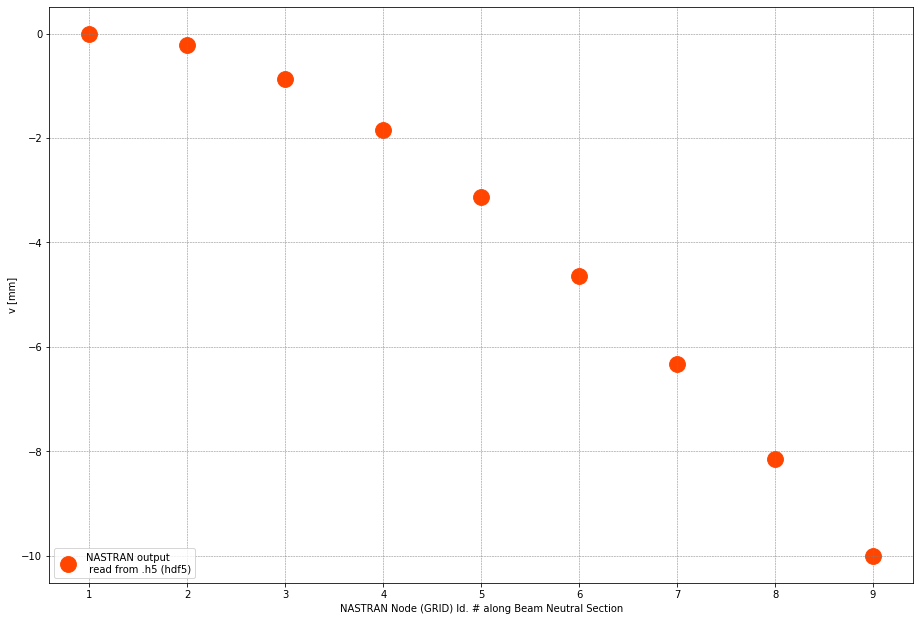

In [12]:
fig = plt.figure()
ax = fig.add_axes((0.2, 0.2, 2., 2.))
ax.grid(color='grey', linestyle='--', linewidth=0.5)
ax.scatter(u.keys(),u.values(),marker='o',s=250,color='orangered',label='NASTRAN output\n read from .h5 (hdf5)')
ax.set_xlabel ('NASTRAN Node (GRID) Id. # along Beam Neutral Section')
ax.set_ylabel ('v [mm]')
plt.legend(loc=3)
fig.show()

## The end of the notebook.